# **Báo cáo cuối kì: Trực quan hóa dữ liệu !!!**

---



Khi kinh doanh, mục đích chung của doanh nghiệp chắc chắn là tối đa hóa lợi nhuận hoặc doanh thu từ việc kinh doanh. Doanh thu là chỉ số quan trọng ảnh hưởng đến sự tồn tại và phát triển của doanh nghiệp. vì vậy doanh nghiệp không thể chi trả cho hoạt động kinh doanh nếu không có doanh thu.
  

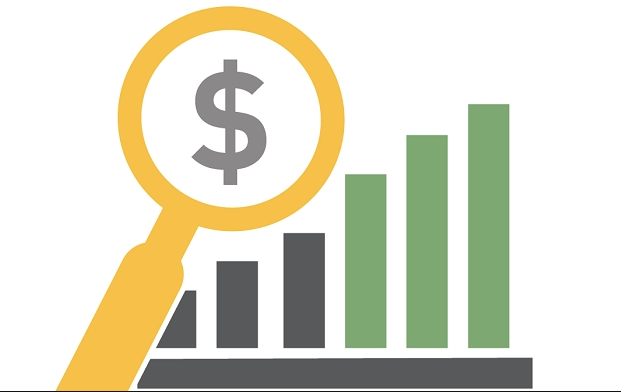

Bối cảnh: Bộ dữ liệu được thu thập tại một cửa hàng ở Edinburgh, Scotland. Bộ dữ liệu cung cấp chi tiết các giao dịch trực tuyến của các mặt hàng khác nhau từ tiệm bánh trong khoảng thời gian từ 30/10/2016 tới 12/03/2017



+ Việc phân tích dữ liệu bán hàng có mục đích cung cấp thông tin giá trị về các sản phẩm - dịch vụ, hiệu quả của các hoạt động bán hàng, các cơ hội và thách thức trong thị trường, dự báo bán hàng và tạo ra doanh thu.
+ Việc phân tích này giúp cho doanh nghiệp có những kiến ​​thức quan trọng để tối ưu hóa hoạt động bán hàng và đạt được mục tiêu tối đa hóa doanh thu hoặc lợi nhuận.
+ Hiểu được tầm quan trọng của việc phân tích dữ liệu doanh thu, nhóm bọn em quyết định thử sức với bộ dữ liệu của một cửa hàng bán bánh ở Edin burgh, Scotland. Bộ dữ liệu cung cấp chi tiết giao dịch của các khách hàng từ 11 - 1 - 2016 đến 03 12 27.

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import association_rules, apriori
import plotly.express as px


In [ ]:
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]

In [ ]:
# Đọc dữ liệu
df = pd.read_csv("Bakery.csv")
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


In [ ]:
# Thông tin tập dữ liệu
df.info()
print(df.drop_duplicates(['TransactionNo']))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB
       TransactionNo          Items             DateTime    Daypart  DayType
0                  1          Bread  2016-10-30 09:58:11    Morning  Weekend
1                  2   Scandinavian  2016-10-30 10:05:34    Morning  Weekend
3                  3  Hot chocolate  2016-10-30 10:07:57    Morning  Weekend
6                  4         Muffin  2016-10-30 10:08:41    Morning  Weekend
7                  5         Coffee  2016-10-30 10:13:03    Morning  Weekend
...              ...            ...                  ...        ...      ...


Bộ dữ liệu gồm có 20507 dòng, trên 9000 giao dịch và 5 thuộc tính:
+ TransactionNo: mã giao dịch
+ Items: món hàng
+ DateTime: thời gian thực hiện giao dịch
+ Daypart: các phân đoạn trong ngày, bao gồm: sáng, trưa, chiều, tối.
+ DayType: loại ngày trong tuần, cuối tuần hay ngày thường


In [ ]:
# Khảo sát từng giá trị trong tập dữ liệu
df.describe(include="all")

,TransactionNo,Items,DateTime,Daypart,DayType
count,20507.000000,20507,20507,20507,20507
unique,NaN,94,9465,4,2
top,NaN,Coffee,2017-02-17 14:18:20,Afternoon,Weekday
freq,NaN,5471,11,11569,12807
mean,4976.202370,NaN,NaN,NaN,NaN
std,2796.203001,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN
25%,2552.000000,NaN,NaN,NaN,NaN
50%,5137.000000,NaN,NaN,NaN,NaN
75%,7357.000000,NaN,NaN,NaN,NaN


In [ ]:
# Thực hiện một số thủ thuật trước khi phân tích tập dữ liệu
# Chia cột giá trị thời gian rõ ràng thành các cột giờ, thứ, tháng, năm
from datetime import datetime
time=pd.to_datetime(df['DateTime'])
df['Day']=time.dt.day_name()
df['Month_number']=time.dt.month
df['Year']=time.dt.year
print(df)

       TransactionNo          Items             DateTime    Daypart  DayType  \
0                  1          Bread  2016-10-30 09:58:11    Morning  Weekend   
1                  2   Scandinavian  2016-10-30 10:05:34    Morning  Weekend   
2                  2   Scandinavian  2016-10-30 10:05:34    Morning  Weekend   
3                  3  Hot chocolate  2016-10-30 10:07:57    Morning  Weekend   
4                  3            Jam  2016-10-30 10:07:57    Morning  Weekend   
...              ...            ...                  ...        ...      ...   
20502           9682         Coffee  2017-09-04 14:32:58  Afternoon  Weekend   
20503           9682            Tea  2017-09-04 14:32:58  Afternoon  Weekend   
20504           9683         Coffee  2017-09-04 14:57:06  Afternoon  Weekend   
20505           9683         Pastry  2017-09-04 14:57:06  Afternoon  Weekend   
20506           9684      Smoothies  2017-09-04 15:04:24  Afternoon  Weekend   

          Day  Month_number  Year  
0  

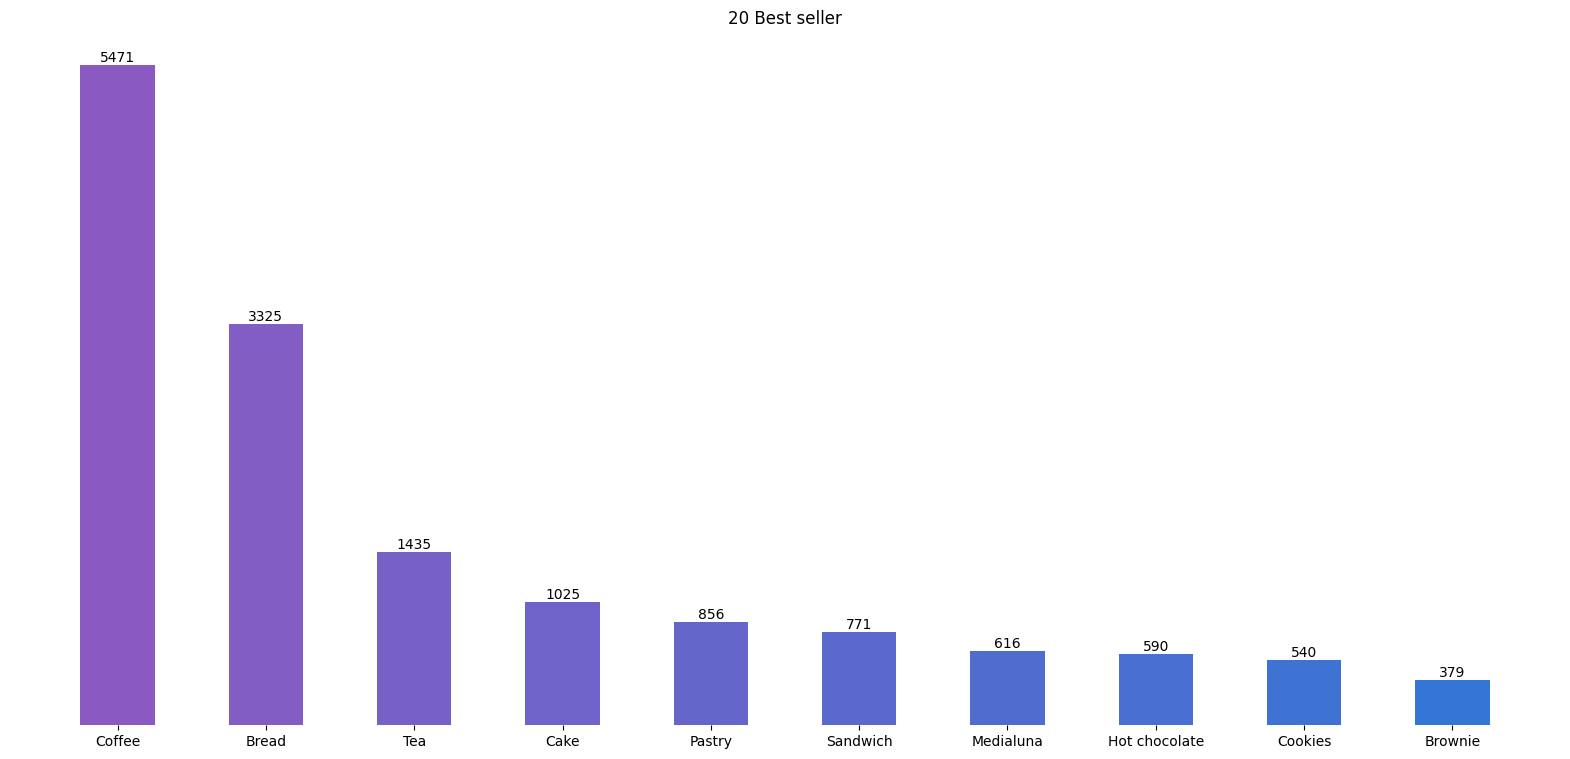

In [ ]:
# 20 sản phẩm bán chạy nhất của tiệm

item = df['Items'].value_counts().sort_values(ascending=False)
value = list(item)
name = list(item.keys())

fig = plt.figure(figsize = (20,9))
bars = plt.bar(name[0:10], value[0:10], color=get_color_gradient("#8A5AC2", "#3575D5", len(name[0:10])), width=0.5)
plt.title("20 Best seller")
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(value[i]), ha='center', va='bottom')

ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

Text(0, 0.5, 'Số Lượng')

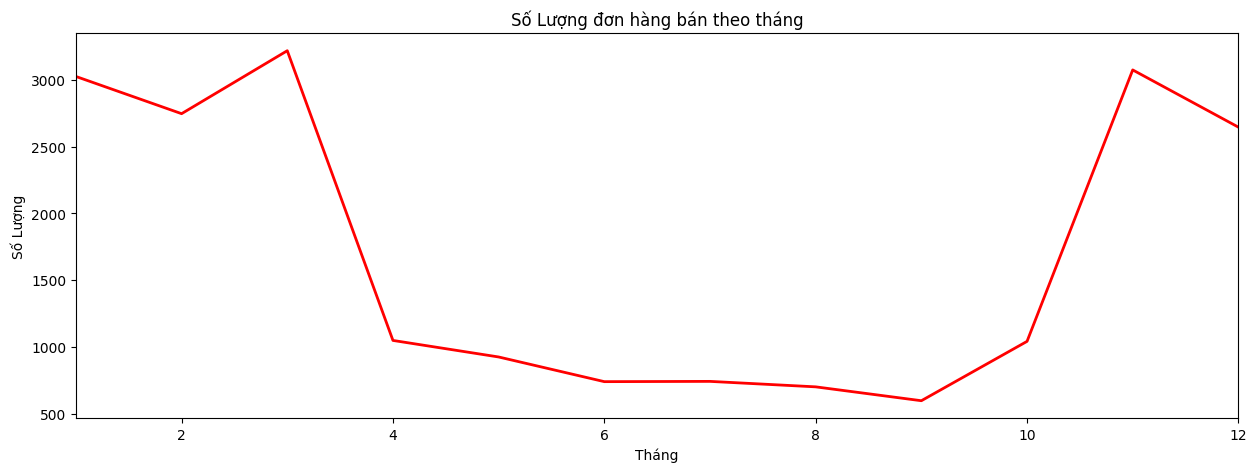

In [ ]:
# Số lượng đơn hàng bán được theo tháng
amount = df.groupby('Month_number')['Items'].count()
value = list(amount)
name = list(amount.keys())

fig , axes = plt.subplots(figsize = (15,5))
axes.plot(name, value, color = '#FF0000', linewidth = 2, alpha = 1)
axes.set_xlim([1,12])
axes.set_title("Số Lượng đơn hàng bán theo tháng")
axes.set_xlabel("Tháng")
axes.set_ylabel("Số Lượng")

Daypart
Afternoon    11569
Evening        520
Morning       8404
Night           14
Name: Items, dtype: int64


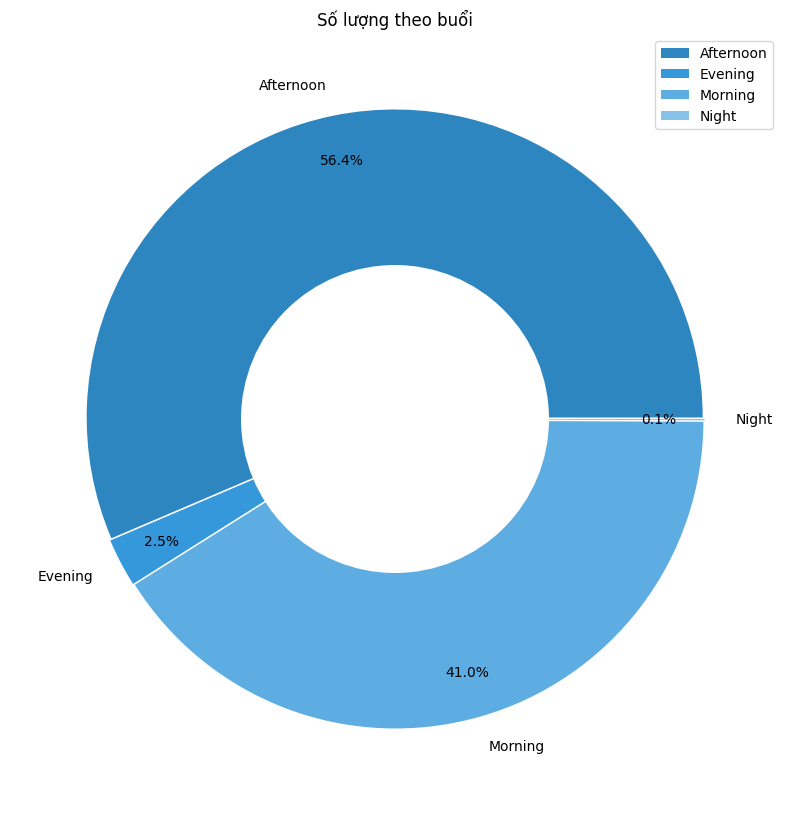

In [ ]:
# Số lượng đơn hàng bán được theo buổi (Morning, Afternoon,...)
fig, ax = plt.subplots(figsize =(10, 10))
day = df.groupby('Daypart')['Items'].count()
print(day)
value = list(day)
name = list(day.keys())

color = ['#2E86C1','#3498DB','#5DADE2','#85C1E9']
explode = (0.005,0.005,0.005,0.005)
ax.pie(value,explode = explode, labels = name, colors = color, autopct = '%0.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.legend(labels=name, loc='best')
ax.set(title ="Số lượng theo buổi")
plt.show()

[Text(0.5, 1.0, 'Số lượng theo ngày')]

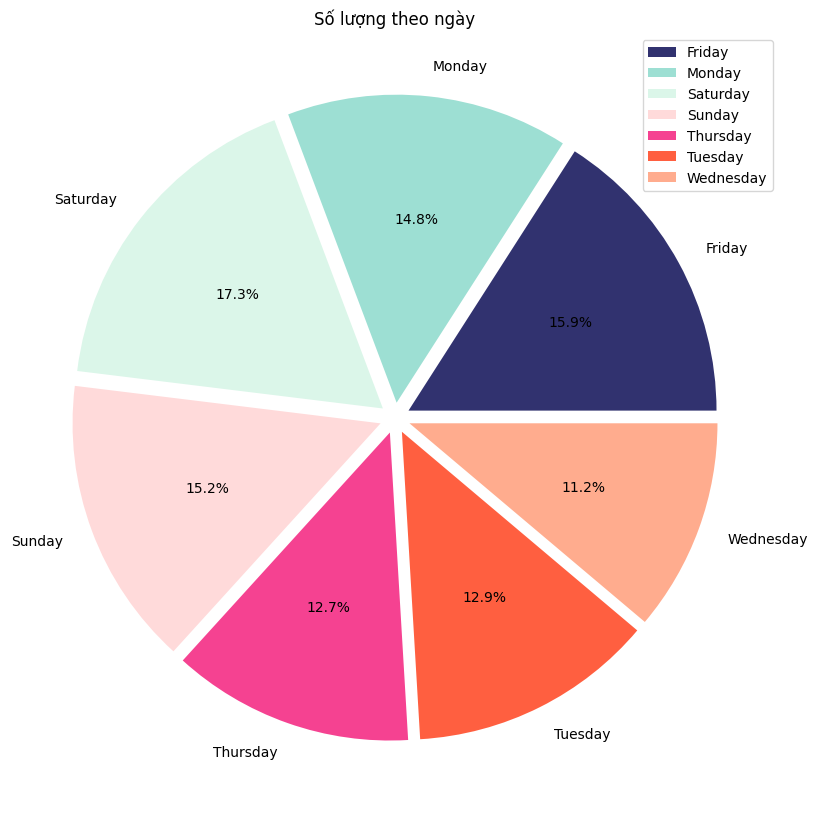

In [ ]:
# Số lượng đơn hàng bán được theo ngày (Monday, Tuesday, We...)
fig, ax = plt.subplots(figsize =(10, 10))
day_2 = df.groupby('Day')['Items'].count()
value_2 = list(day_2)
name_2 = list(day_2.keys())

color = ['#31326F','#9DDFD3','#DBF6E9','#FFDADA','#F54291','#FF5F40','#FFAC8E']
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05)
ax.pie(value_2, explode = explode, labels = name_2, colors = color, autopct = '%0.1f%%')
ax.legend(labels=name_2, loc='best')
ax.set(title ="Số lượng theo ngày")

Cà phê cho thấy sức hút của mình, một tách cà phê buổi sáng để bắt đầu một ngày làm việc hứng khởi. Tiếp theo đó là Bánh mì và Trà là 2 sản phẩm được tiêu thụ nhiều nhất. Cửa hàng bắn chạy nhất vào buổi sáng và trưa với []% và []% doanh số bán hàng, sau đó buổi chiều và tối không đáng kể.
Doanh số bán hàng nhiều nhất vào Thứ 7 và đồng đều trong những ngày còn lại. Ngoài ra cửa hàng bán chạy nhất vào tháng 3 và tháng 11 (Nhận xét chưa chính  thức)

In [ ]:
# Số lượng từng sản phẩm bán được theo tháng (?) -

# Bài toán khai thác tập phổ biến
Có bao giờ bạn tự hỏi tại sao các mặt hàng sản phẩm này trong siêu thị lại được xếp cạnh nhau?. Tại sao bột giặt lại được xếp ngăn giữa còn thuốc tẩy ở dưới cùng? Đây chính là một phần ứng dụng việc khai phá dữ liệu mà cụ thể hơn là khai phá các tập phổ biến!

Bài toán khai thác tập phổ biến là lớp bài toán rất quan trọng trong lĩnh vực khai phá dữ liệu. Mục tiêu là tìm tất cả các tập mẫu, liên kết, tương quan hoặc cấu trúc nhân quả có độ phổ biến cao trong tập hợp tất cả các hạng mục hoặc đối tượng trong cơ sở dữ liệu giao dịch, cơ sở dữ liệu quan hệ và các kho thông tin dữ liệu khác.

Bài toán khai thác tập phổ biến được ứng dụng giải quyết nhiều bài toán như: thiết kế danh mục, phân loại, dự đoán bệnh tật, trong đó nổi tiếng nhất là phân tích giỏ hàng (dự đoán, gợi ý các món hàng thường được mua kèm với nhau).

Dựa trên tính chất của tập phổ biến, thuật toán Apriori ra đời: Ở đây ta chỉ nói về kết quả của thuật toán Apriori.
Thuật toán Apriori trả về các kết quả:
- Support: Độ hỗ trợ là độ phổ biến của sản phẩm trong tập
- Confidence: Độ tin cậy là khả năng khách hàng mua cả 2 mặt hàng cùng nhau.
- Lift: Xác suất để mọi người mua cùng lúc 2 sản phẩm thay vì 1



Lập danh sách tất cả các sản phẩm theo mã định danh

In [ ]:
transacts = df.groupby(["TransactionNo","Items"])["Items"].count().reset_index(name="Quantity")
print(transacts)

      TransactionNo          Items  Quantity
0                 1          Bread         1
1                 4         Muffin         1
2                17  Hot chocolate         1
3                18     Farm House         1
4                22            Jam         1
...             ...            ...       ...
3626           9670     Farm House         1
3627           9671          Bread         1
3628           9674         Coffee         1
3629           9680          Bread         1
3630           9684      Smoothies         1

[3631 rows x 3 columns]


In [ ]:
pivot = transacts.pivot_table(index="TransactionNo",columns="Items",values="Quantity",aggfunc="sum").fillna(0)
def table(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

pivot = pivot.applymap(table)

pivot.head()

Items,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Baguette,Bakewell,Bare Popcorn,Basket,Bread,Brownie,...,Tea,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
TransactionNo,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_apriori = apriori(pivot, min_support = 0.02, use_colnames = True)
data_apriori.sort_values("support",ascending = False)


,support,itemsets
0,0.309006,(Bread)
2,0.277609,(Coffee)
3,0.054806,(Farm House)
5,0.051776,(Tea)
4,0.031121,(Scandinavian)
1,0.026164,(Cake)


In [ ]:
association_rules_ = association_rules(data_apriori, metric = "lift" , min_threshold = 1)
association_rules_.sort_values("confidence",ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


- Support: Độ hỗ trợ là độ phổ biến của sản phẩm trong tập (tần suất của một sản phẩm trong tổng số giao dịch)
-	Confidence: Độ tin cậy xác định mức độ chắc chắn của một luật kết hợp (khả năng khách hàng mua cả 2 mặt hàng cùng nhau)
-	Lift: tỷ lệ tăng xác định mức độ ảnh hưởng của sản phẩm này đến sản phẩm khác (tỷ lệ xuất hiện của 2 sản phẩm so với 1)
-	Leverage: đòn bẩy là mức độ phụ thuộc giữa các sản phẩm
-	Conviction: Độ thuyết phục xác định mức độ liên kiến của luật kết hợp ( mức độ độc lập giữa 2 sản phẩm )

 Danh sách thành viên nhóm:
 - Nguyễn Trọng Tấn - 20110303
 - Trần Thị Kỳ Phương - 20110287